In [1]:
import pandas as pd
import copy
import numpy as np
import networkx as nx
from netwulf import visualize
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv("data/anonymous_data.csv")

In [3]:
df[5:10]

,ID,eta,Sesso,alloggio_pendolare,tempo_libero,pranzo,studiare,fuori
5,144,19,Femmina,Faccio il pendolare,"Programmare, Giocare ai Videgames, Praticare S...",107,107,107
6,192,19,Maschio,Alloggio a Perugia,"Giocare ai Videgames, Praticare Sport, Guardar...",129,129,129
7,203,19,Maschio,Alloggio a Perugia,"Programmare, Giocare ai Videgames, Guardare se...",101,101,101
8,197,18,Maschio,Alloggio a Perugia,"Programmare, Uscire",200,200,200
9,161,19,Maschio,Alloggio a Perugia,"Programmare, Giocare ai Videgames, Leggere fum...",NaN,NaN,NaN


### Graph Creation and Social Network Visualization

In [4]:
G = nx.Graph()
columns = ['pranzo', 'studiare', 'fuori']
for feature in columns:
  for index, utente in df[['ID', feature]].iterrows():
    # G.add_node(utente[0]) # add also singleton
    if pd.isna(utente[1]):
      continue
    link = utente[1].split(' ')
    for txt in link:
      if txt.isnumeric():
        G.add_edge(utente[0], int(txt))

In [5]:
print(f'Num nodes: {len(list(G.nodes))}')
print(f'Num edges: {len(list(G.edges))}')

Num nodes: 34
Num edges: 42


In [6]:
sorted(list(nx.degree_centrality(G).items()), key=lambda x: x[1], reverse=True)

[(115, 0.30303030303030304),
 (114, 0.18181818181818182),
 (178, 0.12121212121212122),
 (201, 0.12121212121212122),
 (136, 0.12121212121212122),
 (134, 0.12121212121212122),
 (87, 0.09090909090909091),
 (197, 0.09090909090909091),
 (200, 0.09090909090909091),
 (205, 0.09090909090909091),
 (108, 0.09090909090909091),
 (187, 0.09090909090909091),
 (118, 0.09090909090909091),
 (111, 0.09090909090909091),
 (203, 0.06060606060606061),
 (122, 0.06060606060606061),
 (164, 0.06060606060606061),
 (215, 0.06060606060606061),
 (83, 0.06060606060606061),
 (212, 0.06060606060606061),
 (202, 0.06060606060606061),
 (196, 0.06060606060606061),
 (101, 0.030303030303030304),
 (144, 0.030303030303030304),
 (107, 0.030303030303030304),
 (192, 0.030303030303030304),
 (129, 0.030303030303030304),
 (99, 0.030303030303030304),
 (185, 0.030303030303030304),
 (165, 0.030303030303030304),
 (170, 0.030303030303030304),
 (175, 0.030303030303030304),
 (180, 0.030303030303030304),
 (120, 0.030303030303030304)]

#### Utilities function

In [43]:
def plot_network(G, fig_title=''):
    colors = [G[u][v].get('color','black') for u,v in G.edges()]
    weights = [G[u][v].get('weight',1) for u,v in G.edges()]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10), dpi=80)
    fig.suptitle(fig_title,fontsize=23, fontweight='bold')

    # Visualization 1
    pos_attrs1 = {}
    circPos1 = nx.shell_layout(G)
    for node, coords in circPos1.items():
        pos_attrs1[node] = (coords[0]+0.01, coords[1]-.05)
    nx.draw_networkx_labels(G,pos=circPos1, ax=axes[0]) 
    nx.draw(G,pos=pos_attrs1, node_size=40, ax=axes[0], edge_color=colors, width=weights)
    axes[0].set_title('Visualization1')

    # Visualization 2
    pos_attrs2 = {}
    circPos2 = nx.spring_layout(G, k=0.2, iterations=20)
    for node, coords in circPos2.items():
        pos_attrs2[node] = (coords[0]+0.01, coords[1]-.05)
    nx.draw_networkx_labels(G,pos=circPos2, ax=axes[1]) 
    nx.draw(G,pos=pos_attrs2, node_size=40, ax=axes[1], edge_color=colors, width=weights)
    axes[1].set_title('Visualization2')


def evaluate(G, G_ground_truth, method_name):
    G_old = copy.deepcopy(G)
    count_red = 0
    count_correct = 0
    for edge in G_old.edges():
        if G_old[edge[0]][edge[1]].get('color') == 'r':
            count_red += 1
            if edge in G_ground_truth.edges():
                count_correct += 1
                G_old[edge[0]][edge[1]]['color'] = 'lime'
                G_old[edge[0]][edge[1]]['weight'] = 4
        
    print(f'Correctness pct of new edges predicted: {count_correct/count_red * 100}%')
    print(f'New edges correctly predicted: {count_correct} on {count_red}')
    plot_network(G_old, f'{method_name.capitalize()} evaluation')

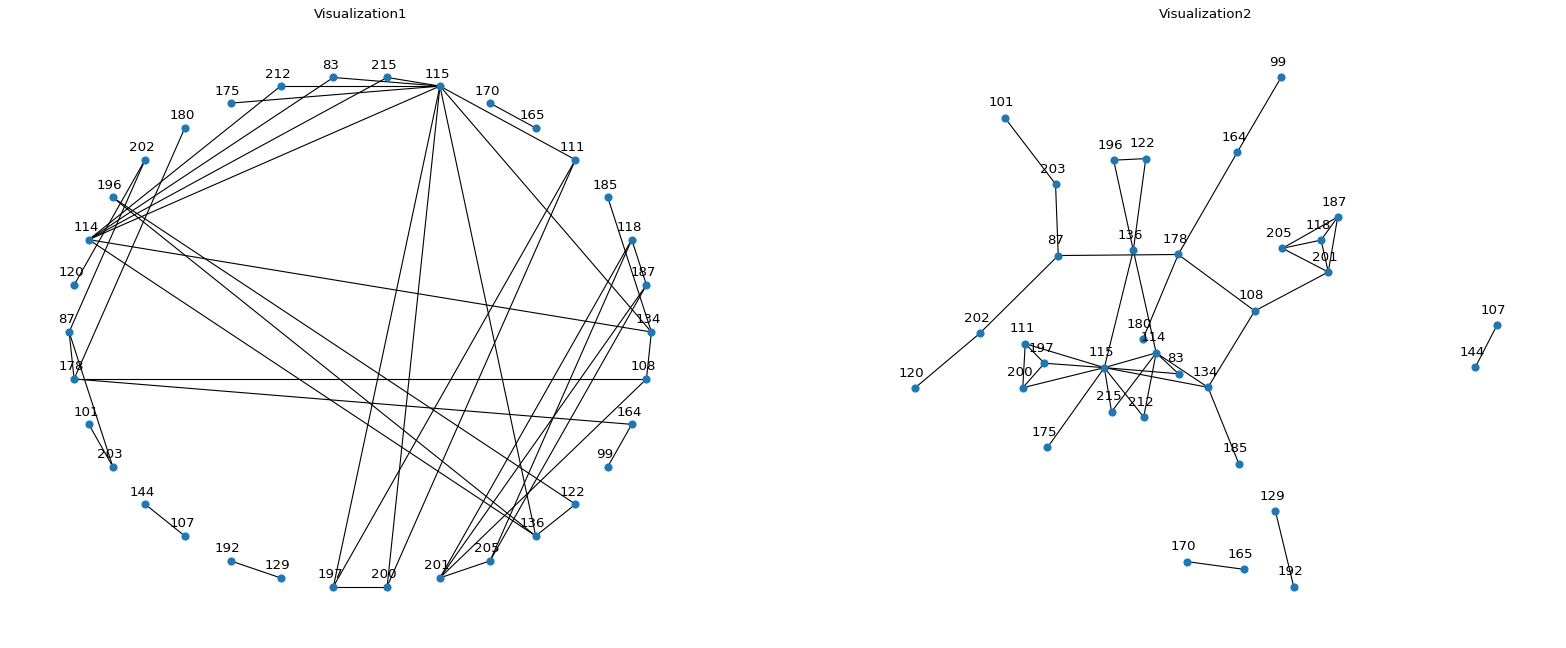

In [8]:
plot_network(G)

---

## Loading Ground Truth Data

In [9]:
df = pd.read_csv("data/anonymous_data_ground_truth.csv")

In [10]:
df[5:10]

,ID,eta,Sesso,alloggio_pendolare,tempo_libero,pranzo,studiare,fuori
5,215,23,Maschio,Alloggio a Perugia,"Guardare serie TV, film o anime",134 185 83 149 114 82 115,134 185 83 149 114 82 115,134 185 83 149 114 82 115
6,152,20,Maschio,Alloggio a Perugia,"Giocare ai Videgames, Pianoforte",NaN,NaN,NaN
7,191,20,Femmina,Alloggio a Perugia,"Leggere libri, Guardare serie TV, film o anime",NaN,NaN,NaN
8,178,20,Femmina,Faccio il pendolare,Shopping,155 180,180,180
9,145,20,Maschio,Alloggio a Perugia,"Praticare Sport, Uscire, Leggere libri, Guarda...",NaN,NaN,NaN


In [11]:
G_ground_truth = nx.Graph()
columns = ['pranzo', 'studiare', 'fuori']
for feature in columns:
  for index, utente in df[['ID', feature]].iterrows():
    # G_ground_truth.add_node(utente[0]) # add also singleton
    if pd.isna(utente[1]):
      continue
    link = utente[1].split(' ')
    for txt in link:
      if txt.isnumeric():
        G_ground_truth.add_edge(utente[0], int(txt))

New Network based only on new form data

In [12]:
print(f'Num nodes: {len(list(G_ground_truth.nodes))}')
print(f'Num edges: {len(list(G_ground_truth.edges))}')

Num nodes: 39
Num edges: 87


In [13]:
df_diff = pd.DataFrame()
df_diff = pd.concat([pd.DataFrame(sorted(list(nx.degree_centrality(G).items()), key=lambda x: x[1], reverse=True)), pd.DataFrame(sorted(list(nx.degree_centrality(G_ground_truth).items()), key=lambda x: x[1], reverse=True))], axis=1)
df_diff.columns = ['old_id', 'old_degree_centrality', 'ground_truth_id', 'ground_truth_centrality']
df_diff['ground_truth_id'] = df_diff['ground_truth_id'].fillna(0).astype(int)
df_diff['old_id'] = df_diff['old_id'].fillna(0).astype(int)
df_diff.index.name = 'degree_centrality_rank'
df_diff

,old_id,old_degree_centrality,ground_truth_id,ground_truth_centrality
degree_centrality_rank,,,,
0,115,0.303030,134,0.289474
1,114,0.181818,185,0.289474
2,178,0.121212,115,0.289474
3,201,0.121212,212,0.289474
4,136,0.121212,69,0.263158
5,134,0.121212,215,0.236842
6,87,0.090909,107,0.157895
7,197,0.090909,73,0.157895
8,200,0.090909,155,0.157895


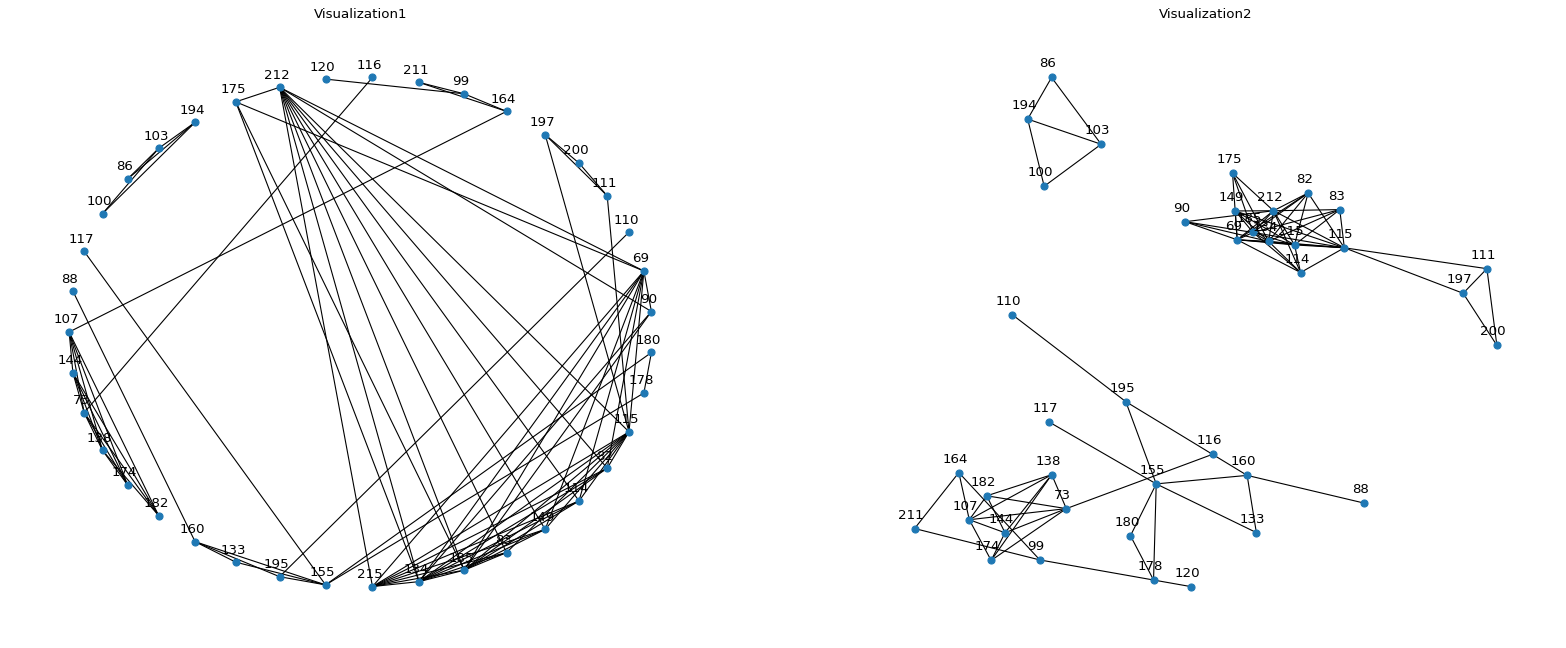

In [14]:
plot_network(G_ground_truth)

Complete Network with new and old data

In [15]:
for edge in list(G.edges()):
    if edge not in list(G_ground_truth.edges()):
        G_ground_truth.add_edge(edge[0], edge[1])

print(f'Num nodes: {len(list(G_ground_truth.nodes))}')
print(f'Num edges: {len(list(G_ground_truth.edges))}')

Num nodes: 55
Num edges: 112


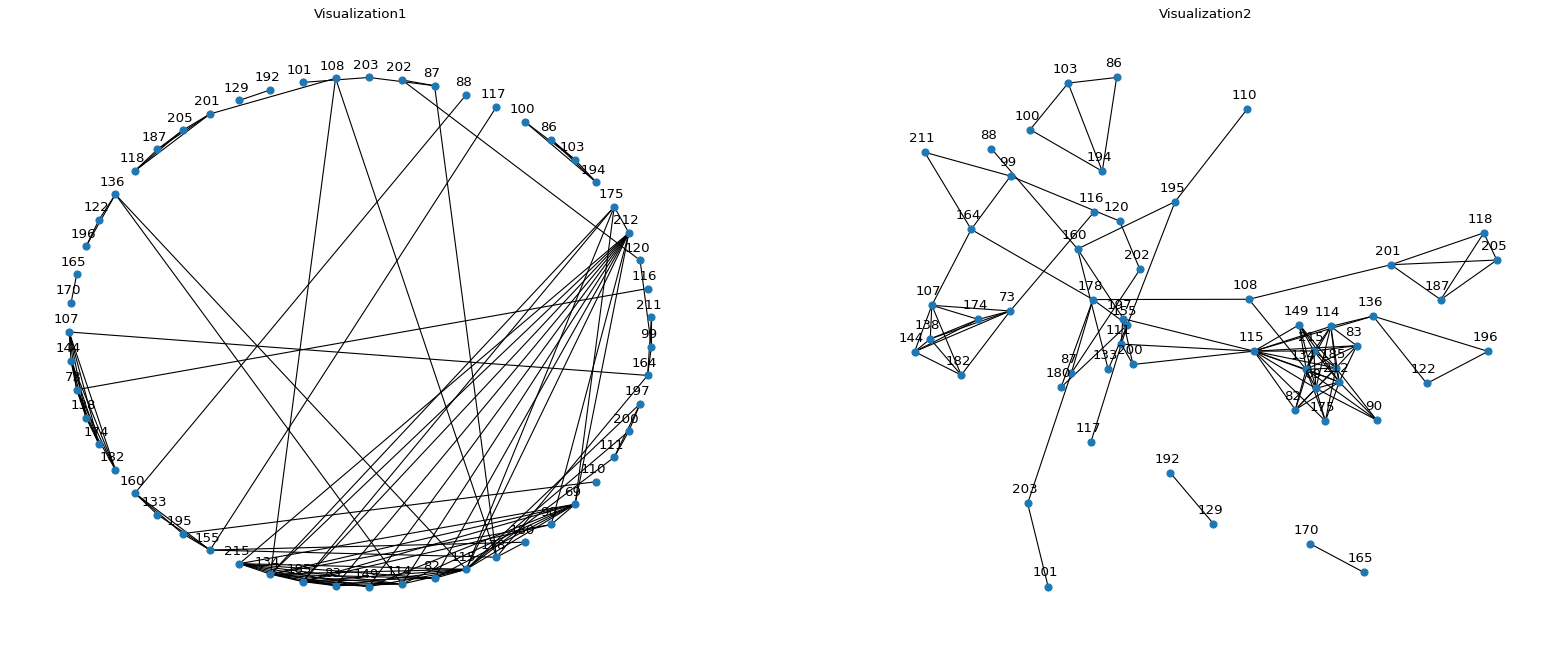

In [16]:
plot_network(G_ground_truth)

In [17]:
node_diff = len(list(G_ground_truth.nodes)) - len(list(G.nodes))
edge_diff = len(list(G_ground_truth.edges)) - len(list(G.edges))
print(f'Nodes Difference between new and old networks: {node_diff}')
print(f'Edges Difference between new and old networks: {edge_diff}')

print(f'Nodes Difference between new and old networks pct: {node_diff / len(list(G.nodes)) *100}%')
print(f'Edges Difference between new and old networks pct: {edge_diff / len(list(G.edges)) * 100}%')

Nodes Difference between new and old networks: 21
Edges Difference between new and old networks: 70
Nodes Difference between new and old networks pct: 61.76470588235294%
Edges Difference between new and old networks pct: 166.66666666666669%


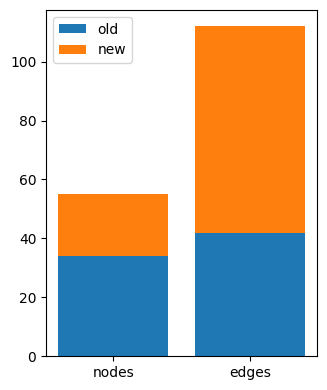

In [18]:
plt.figure(figsize=(3.5,4.5))
plt.bar(['nodes', 'edges'], [len(list(G.nodes)), len(list(G.edges))])
plt.bar(['nodes', 'edges'], [node_diff, edge_diff], bottom=[len(list(G.nodes)), len(list(G.edges))])
plt.legend(['old', 'new'])

--- 

# Social Network Analysis

### Methods used for Link Prediction:
- **Similarity Approach**
    - ***Local Similarity***
        - common_neighbors
        - adamic_adar
        - jaccard
        - node_clustering
    - ***Gloabal Similarity***
        - katz_index
        - link_prediction_rwr
        - sim_rank
    - ***Quasi Local Similarity***
        - local_path_index
        - path_of_length_three
- **Probabilistic Method**
    - stochastic_block_model
- **Information Theory Approach**
    - path_entropy


In [19]:
# Import all needed methods
from cnlp.similarity_methods.local_similarity import common_neighbors, adamic_adar, jaccard, node_clustering
from cnlp.similarity_methods.global_similarity import katz_index, link_prediction_rwr, sim_rank
from cnlp.similarity_methods.quasi_local_similarity import path_of_length_three, local_path_index
from cnlp.probabilistic_methods import stochastic_block_model
from cnlp.other_methods.information_theory import path_entropy

# Utils method
from cnlp.utils import nodes_to_indexes
from cnlp.utils import get_top_predicted_link

#### Utilities Function

In [20]:
def get_G_new(G, new_links, color = 'r'):
    '''
        Return new Graph with new links added
    '''
    G_new = copy.deepcopy(G)

    for edge in new_links:
        G_new.add_edge(edge[0],edge[1],color=color, weight=2)
        
    return G_new


def get_new_links(methods_prediction, name_index_map, G, pct, stats = False):
    new_link_set = set()
    total_link = []
    for method in methods_prediction:
        tmp = get_top_predicted_link(method, G.number_of_nodes(), pct, name_index_map)
        total_link.append(len(tmp))
        for link in tmp:
            new_link_set.add(link)
    if stats:
        print(f'Number of new link for each method: {total_link}, total sum: {sum(total_link)}')
        print(f'Single new link list: {new_link_set}, total new single link: {len(new_link_set)}')

    return new_link_set

In [21]:
name_index_map = list(nodes_to_indexes(G).items())

#### Link prediction Method

In [22]:
predicted_adj_matrix_common_neighbors = common_neighbors(G)
predicted_adj_matrix_adamic_adar = adamic_adar(G)
predicted_adj_matrix_jaccard = jaccard(G)
predicted_adj_matrix_node_clustering = node_clustering(G)
predicted_adj_matrix_katz_index = katz_index(G, .1)
predicted_adj_matrix_link_prediction_rwr = link_prediction_rwr(G)
predicted_adj_matrix_sim_rank = sim_rank(G)
predicted_adj_matrix_path_of_length_three = path_of_length_three(G)
predicted_adj_matrix_local_path_index = local_path_index(G, .1, 5)
predicted_adj_matrix_stochastic_block_model = stochastic_block_model(G, 20)
predicted_adj_matrix_path_entropy = path_entropy(G)

In [69]:
local_similarity_results = [predicted_adj_matrix_common_neighbors, predicted_adj_matrix_adamic_adar, predicted_adj_matrix_jaccard, predicted_adj_matrix_node_clustering]
global_similarity_results = [predicted_adj_matrix_katz_index, predicted_adj_matrix_link_prediction_rwr, predicted_adj_matrix_sim_rank]
quasi_local_similarity_results = [predicted_adj_matrix_path_of_length_three, predicted_adj_matrix_local_path_index]

print('\nLocal Similarity Results')
new_link_set_local = get_new_links(local_similarity_results, name_index_map ,G, 7,stats = True)

print('\nGlobal Similarity Results')
new_link_set_global = get_new_links(global_similarity_results, name_index_map ,G,1, stats = True)

print('\nQuasi Local Similarity Results')
new_link_set_quasi_local = get_new_links(quasi_local_similarity_results, name_index_map ,G, 2,stats = True)


Local Similarity Results
Number of new link for each method: [5, 5, 5, 4], total sum: 19
Single new link list: {(134, 215), (83, 212), (178, 99), (215, 212), (215, 83), (136, 212), (136, 83), (87, 101), (136, 215), (87, 120), (136, 134)}, total new single link: 11

Global Similarity Results
Number of new link for each method: [8, 8, 4], total sum: 20
Single new link list: {(164, 180), (87, 101), (185, 114), (203, 202), (196, 114), (136, 212), (136, 215), (134, 212), (122, 115), (134, 215), (83, 212), (215, 212), (136, 83), (122, 114), (134, 83), (215, 83), (185, 115), (87, 120), (136, 134)}, total new single link: 19

Quasi Local Similarity Results
Number of new link for each method: [5, 15], total sum: 20
Single new link list: {(185, 212), (185, 215), (185, 175), (197, 134), (200, 136), (136, 212), (185, 83), (136, 215), (200, 114), (134, 212), (134, 215), (136, 111), (197, 136), (136, 83), (197, 114), (134, 83), (99, 180), (200, 134), (136, 134), (111, 114)}, total new single link: 

### Explore Results

#### local results

Correctness pct of new edges predicted: 36.36363636363637%
New edges correctly predicted: 4 on 11


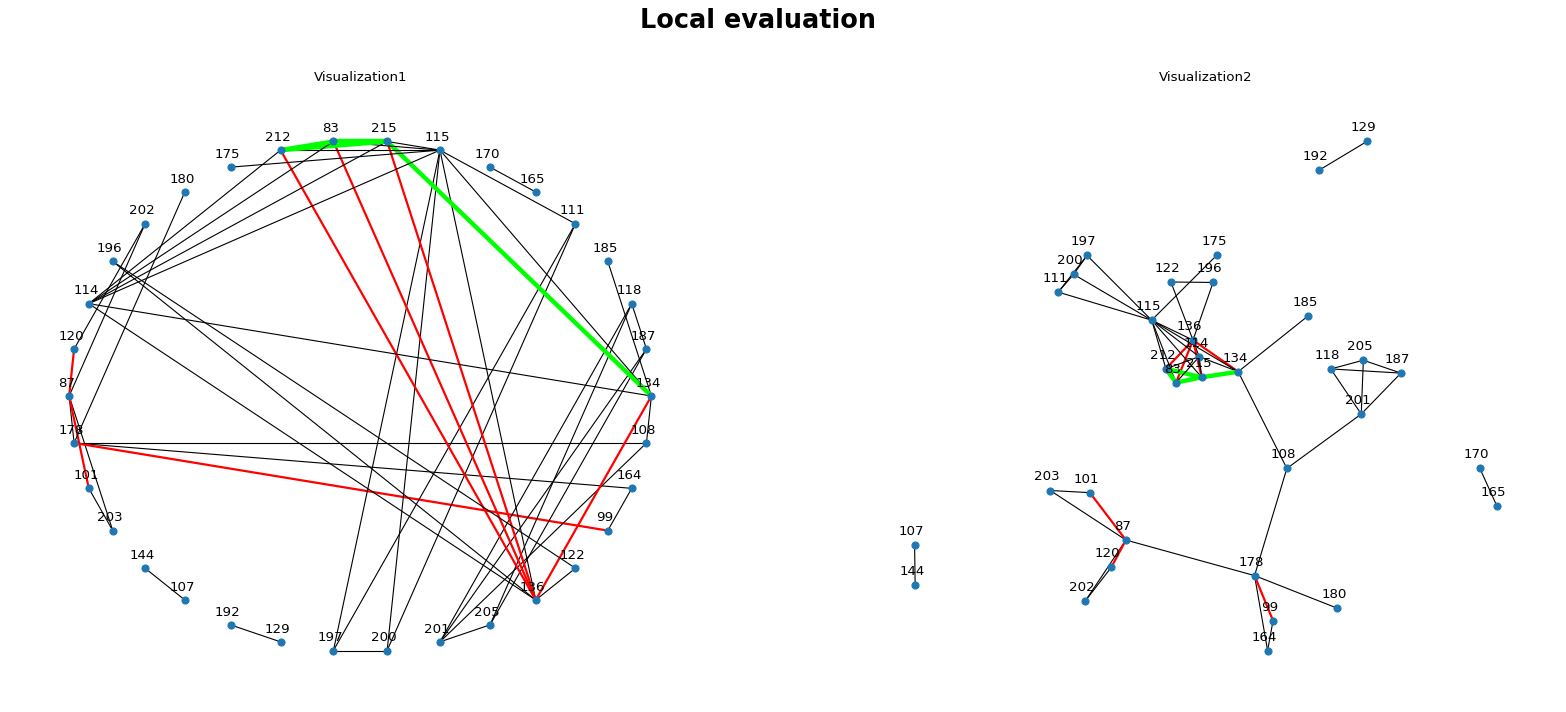

In [70]:
G_new = get_G_new(G, new_link_set_local, 'r')

evaluate(G_new, G_ground_truth, 'local')

#### global results

Correctness pct of new edges predicted: 42.10526315789473%
New edges correctly predicted: 8 on 19


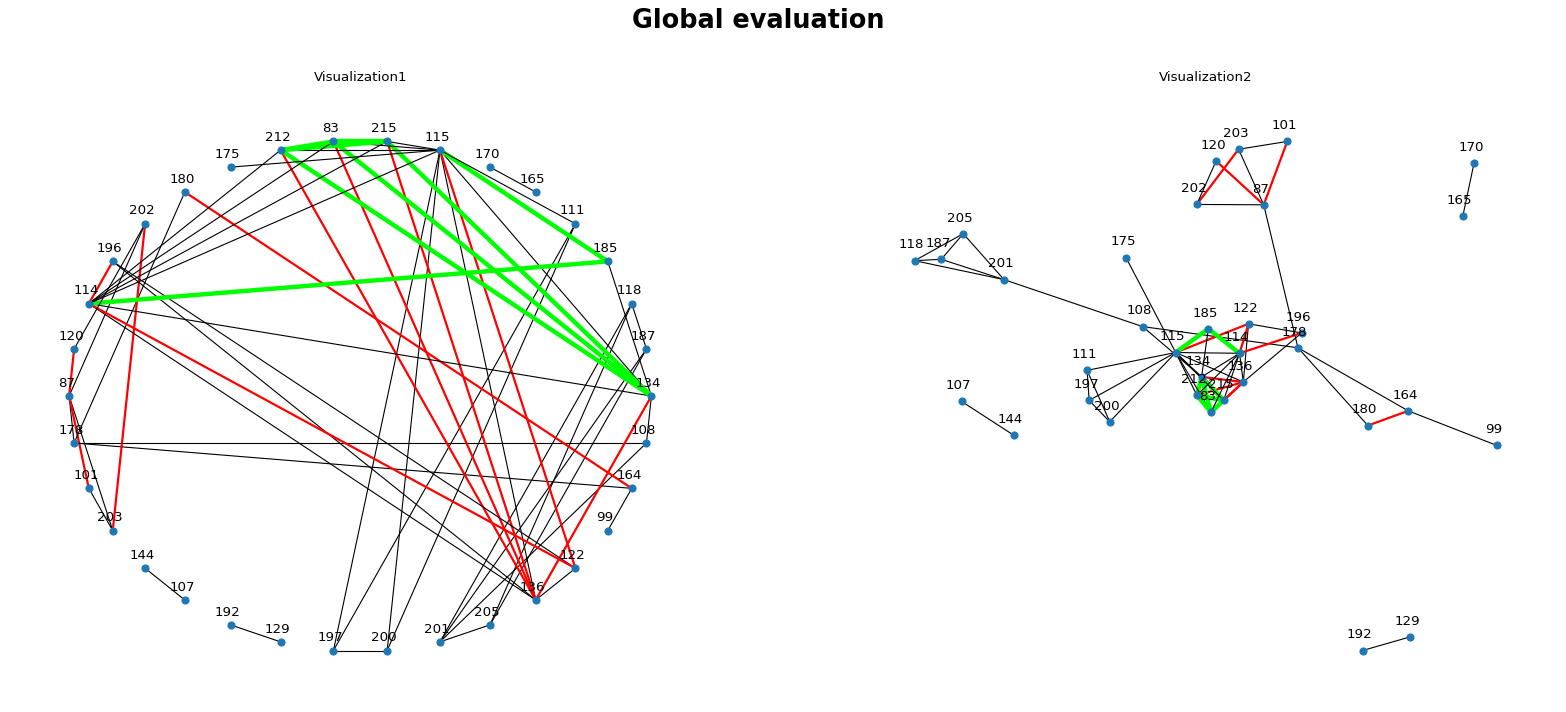

In [71]:
G_new = get_G_new(G, new_link_set_global, 'r')

evaluate(G_new, G_ground_truth, 'global')

#### quasi_local results

Correctness pct of new edges predicted: 35.0%
New edges correctly predicted: 7 on 20


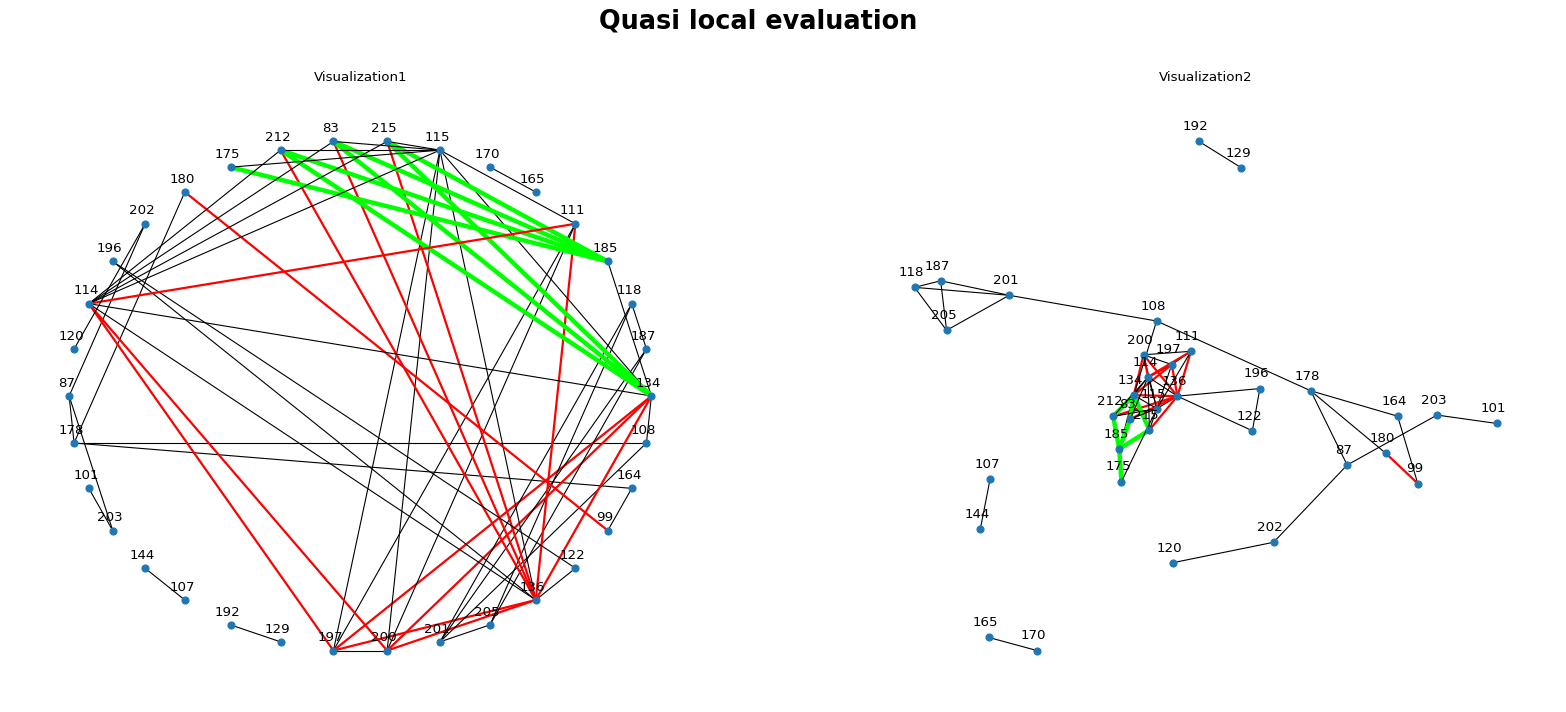

In [72]:
G_new = get_G_new(G, new_link_set_quasi_local, 'r')

evaluate(G_new, G_ground_truth, 'quasi local')

#### Aggregated results
Results of all Similarity Methods aggregating all common predictions.

Correctness pct of new edges predicted: 20.0%
New edges correctly predicted: 1 on 5


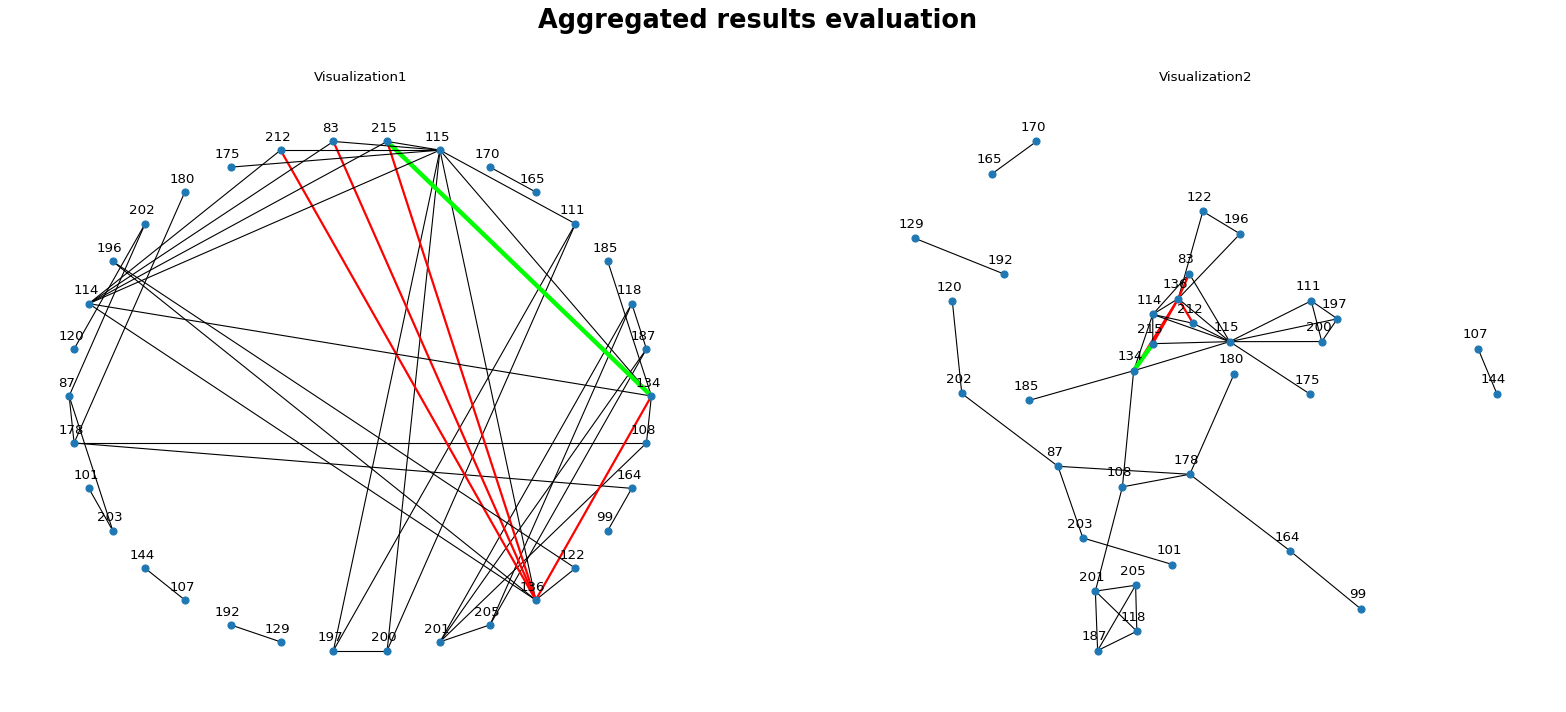

In [73]:
all_similarity = set()
link_intersection = set()
tmp = [new_link_set_global, new_link_set_local, new_link_set_quasi_local]
for pred in tmp:
    all_similarity.update(pred)

link_intersection = new_link_set_global & new_link_set_local & new_link_set_quasi_local
G_new = get_G_new(G, link_intersection, 'r')

evaluate(G_new, G_ground_truth, 'aggregated results')

#### stochastic_block_model results

Correctness pct of new edges predicted: 50.0%
New edges correctly predicted: 3 on 6


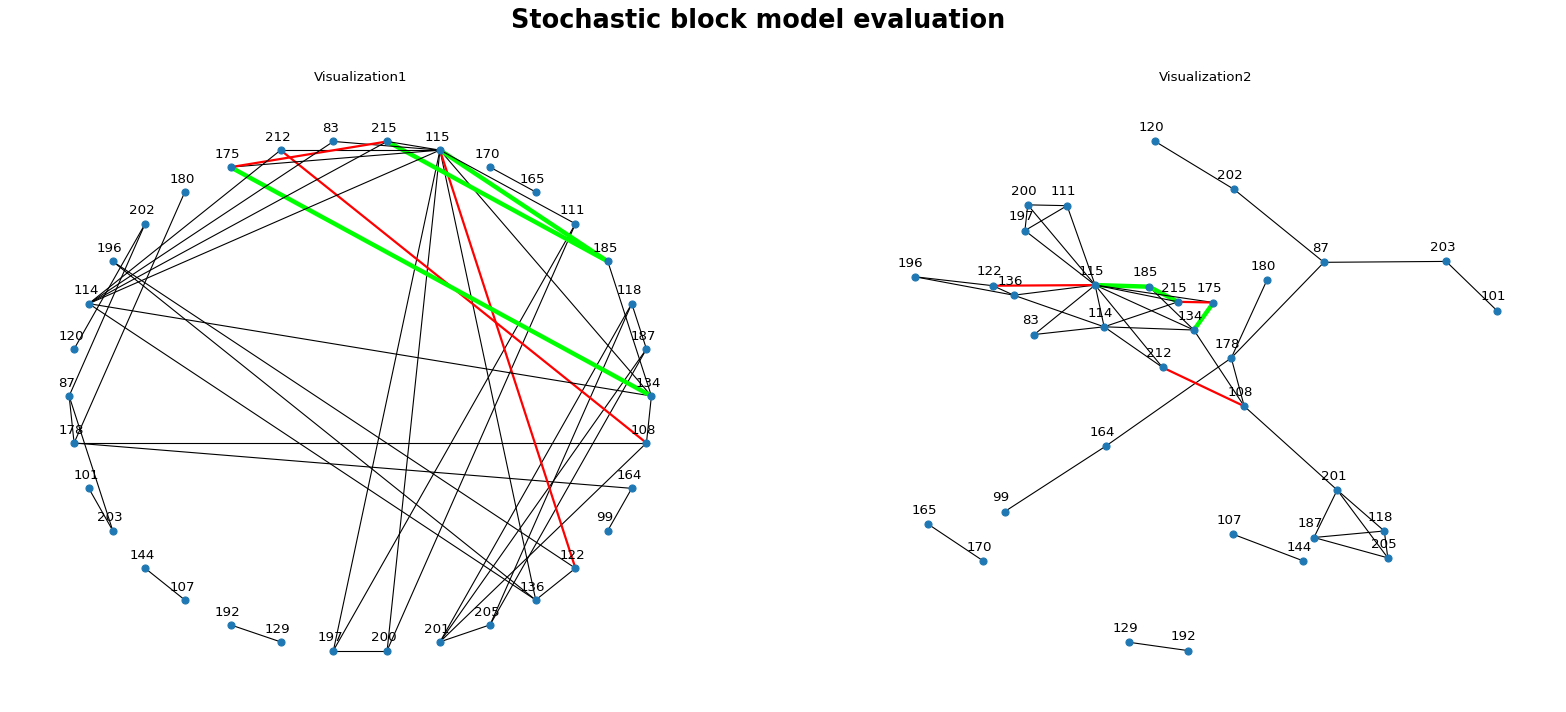

In [64]:
new_links = get_top_predicted_link(predicted_adj_matrix_stochastic_block_model, G.number_of_nodes(), pct_new_link=1, name_index_map=name_index_map)
G_new = get_G_new(G, new_links, 'r')

evaluate(G_new, G_ground_truth, 'stochastic block model')

#### path_entropy results

Correctness pct of new edges predicted: 21.153846153846153%
New edges correctly predicted: 11 on 52


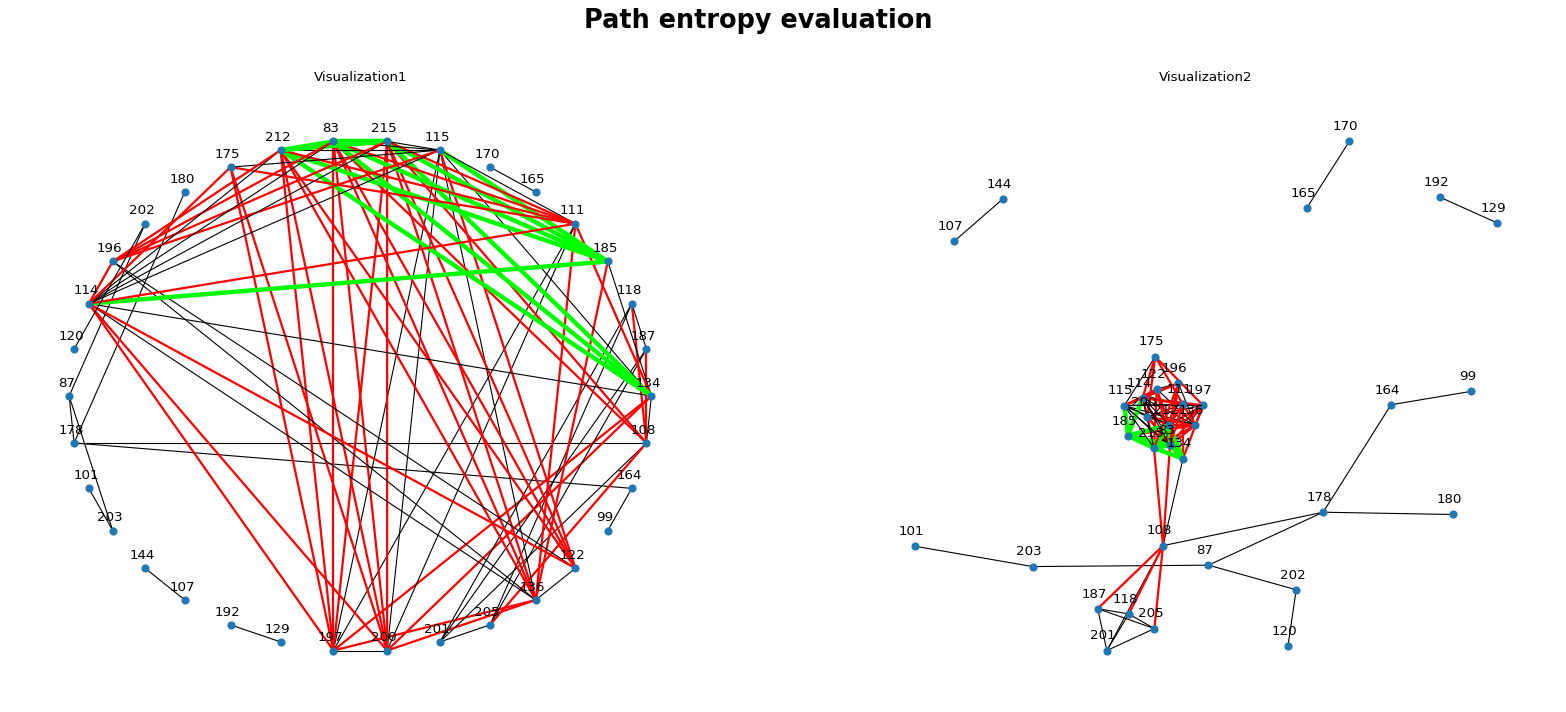

In [58]:
new_links = get_top_predicted_link(predicted_adj_matrix_path_entropy, G.number_of_nodes(), 10, name_index_map)
G_new = get_G_new(G, new_links, 'r')

evaluate(G_new, G_ground_truth, 'path entropy')